In [1]:
import sys
import os
sys.path.append("..")
from pathlib import Path
from services.data_service import PatientRepository, ProtocolRepository
from services.scoring import ProtocolScorer
from utils.mock_data import generate_random_patient, save_patient_to_json
from models.patient import ProtocolRegistry

In [2]:
# Initialize repositories
patient_repo = PatientRepository(data_dir="../data/patients", session_dir="../data/sessions", prescription_dir="../data/prescriptions")
protocol_repo = ProtocolRepository(data_dir="../data/protocols")

patients = patient_repo.get_all_patients()
protocols = protocol_repo.get_all_protocols()

In [3]:
scoring = ProtocolScorer(patients[0], protocols)

In [4]:
scoring.score_all_protocols(0.5,0.5)

[{'protocol_id': 'PR204',
  'name': 'Place it',
  'description': '',
  'difficulty_params': {},
  'type': <ProtocolType.BALANCED: 'balanced'>,
  'difficulty_cognitive': 'high',
  'difficulty_motor': 'high',
  'body_targets': {'arm': 1,
   'shoulder': 1,
   'wrist': 0,
   'finger': 0,
   'trunk': 0},
  'motor_features': {'reaching': True,
   'grasping': True,
   'pinching': True,
   'pronation_supination': False,
   'range_of_motion_h': 'mid',
   'range_of_motion_v': 'mid'},
  'cognitive_features': {'processing_speed': True,
   'attention': False,
   'visual_language': True,
   'visualspatial_processing_awareness_neglect': True,
   'coordination': True,
   'memory_wm': True,
   'memory_semantic': True,
   'math': False,
   'daily_living_activity': True,
   'symbolic_understanding': False,
   'semantic_processing': True},
  'cognitive_demand': 0.8,
  'gamification': {'type': 'AR',
   'feedback_modes': ['visual', 'haptic'],
   'difficulty_scaling': False},
  'safety_constraints': {'max_du

In [4]:
patients[0].clinical_scores.ARAT.deficit()

{'grasp': 0.3333333333333333,
 'grip': 0.3333333333333333,
 'pinch': 0.4444444444444444,
 'gross_movement': 0.3333333333333333}

In [13]:
protocols[11].motor_features

MotorFeatures(reaching=False, grasping=False, pinching=False, pronation_supination=False, range_of_motion_h='low', range_of_motion_v='low')

In [51]:
motor_contributions = scoring._calculate_motor_similarity(protocols[15])[1].values()

In [52]:
motor_contributions = np.array(list(motor_contributions))

In [48]:
motor_contributions

array(dict_values([0.3333333333333333, 0.3333333333333333, 0.0, 0.3333333333333333]),
      dtype=object)

In [ ]:
# Example 1: Patient Weekly Adherence
# patient = patient_repo.get_patient(patients[0])
# patient = patients[0]
# print("Patient ID:", patient.patient_id)
# print("Weekly Adherence:")
# for week, rate in patient.weekly_aggregator.adherence_rate.items():
#     print(f"  {week}: {rate:.1%}")

In [ ]:
# # Example 2: Protocol Performance for a Patient
# print("\nProtocol Performance:")
# for protocol_id, score in patients[0].protocol_aggregator.protocol_scores.items():
#     print(f"  {protocol_id}: {score:.2f}")

In [5]:
patient_protocol_sessions = patients[0].protocol_aggregator
ewma_metrics = patient_protocol_sessions.protocol_scores
ewma_metrics

{'PR10': {'ewma_adherence': 0.9173367106501843,
  'ewma_performance': 0.8265539932414742,
  'ewma_difficulty_modulator_change': 0.14548814882787406},
 'PR200': {'ewma_adherence': 0.7492587159250765,
  'ewma_performance': 0.8328097749505569,
  'ewma_difficulty_modulator_change': -0.034888392724379186},
 'PR201': {'ewma_adherence': 0.786891377172882,
  'ewma_performance': 0.8539800129618855,
  'ewma_difficulty_modulator_change': -0.08215312002940257},
 'PR202': {'ewma_adherence': 0.7964881444957648,
  'ewma_performance': 0.8273098198376571,
  'ewma_difficulty_modulator_change': -0.21513935883501972},
 'PR203': {'ewma_adherence': 0.6533218641652331,
  'ewma_performance': 0.7417482089259917,
  'ewma_difficulty_modulator_change': 0.20702562182025921},
 'PR204': {'ewma_adherence': 0.43773060927947155,
  'ewma_performance': 0.8593605022343439,
  'ewma_difficulty_modulator_change': -0.0667924454263961},
 'PR205': {'ewma_adherence': 0.748750599788553,
  'ewma_performance': 0.8004555331046682,
 

In [9]:
registry.patient_aggregators['PR10'].patient_stats

{'P001': {'num_sessions': 4,
  'total_duration': 151.86897124591704,
  'sessions': [Session(session_id='S001', patient_id='P001', protocol_id='PR10', prescription_id='PRESC001', timestamp=datetime.datetime(2024, 2, 19, 12, 0), duration=35.35847652186102, difficulty_modulator=0.7444487976072353, performance_score=0.8924596997794458, prescribed_duration=37, adherence=0.9556345005908384),
   Session(session_id='S002', patient_id='P001', protocol_id='PR10', prescription_id='PRESC001', timestamp=datetime.datetime(2024, 2, 19, 8, 0), duration=21.93175402516774, difficulty_modulator=0.030550809757448283, performance_score=0.6924903192321064, prescribed_duration=37, adherence=0.5927501087883174),
   Session(session_id='S003', patient_id='P001', protocol_id='PR10', prescription_id='PRESC001', timestamp=datetime.datetime(2024, 2, 19, 18, 0), duration=35.57018866291066, difficulty_modulator=0.8118891228699661, performance_score=0.7579143644039167, prescribed_duration=37, adherence=0.9613564503489

In [7]:

# # Example 3: Cross-Patient Protocol Statistics
registry = ProtocolRegistry(
    protocols={p.protocol_id: p for p in protocols}
)
registry.update_aggregators(patients)

adherence_protocols = {}

print("\nGlobal Protocol Performance:")
for protocol_id, aggregator in registry.patient_aggregators.items():
    # print(f"  {protocol_id}:")
    # print(f"    Average Adherence: {aggregator.average_adherence:.2f}")
    # print(f"    Average Performance: {aggregator.average_performance:.2f}")
    # print(f"    Total Patients: {len(aggregator.patient_stats)}")
    # print(f"    Total Sessions: {sum(len(s['sessions']) for s in aggregator.patient_stats.values())}")
    adherence_protocols[protocol_id] = aggregator.average_adherence


Global Protocol Performance:


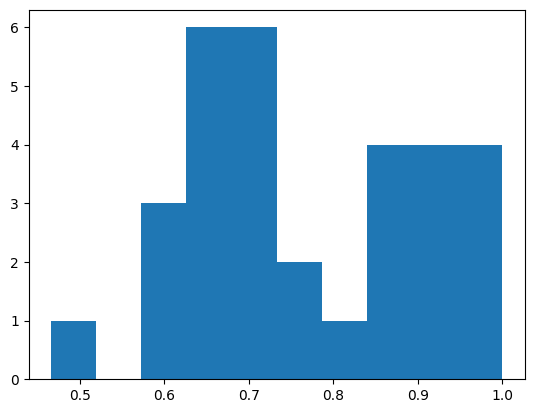

In [8]:
import matplotlib.pyplot as plt
# adherence_protocols.items()
plt.hist(adherence_protocols.values())
plt.show()